In [1]:
import sys 
import os
sys.path.append(os.path.abspath("../"))
from sandbox.PCT_node import PCT_node

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp


In [14]:

def sensor(observation):
    return observation

def comparator(ref, sens):
    error = sens - ref
    return error 

def control_update(error, Kp, Ki, Kd):
    #if error < -0.1 or error > :
    #if abs(error) > 0.3:
    Kp += error*0.1
    #if abs(error) > 0.7:
    Ki += error*0.1
    if abs(error) > 0.3:
        Kd += error*0.01
    #print(Kp, Ki, Kd, error)
    return Kp, Ki, Kd

In [18]:
agent_a = PCT_node(state_size = 1, sensor=sensor, comparator=comparator, 
Kp = 0, Kd = 0, Ki = 0, control_update=control_update, output_limits=(0,1))
agent_b = PCT_node(state_size = 1, sensor=sensor, comparator=comparator,
 Kp = 0, Kd = 0, Ki = 0, control_update=control_update, output_limits=(0,1))
time_limit = 25
time = [t for t in range(time_limit)]
#reference_signal = 0.7
#reference_signal = np.random.rand(1,time_limit)[0]
#ref_a = [np.sin([t])[0]+1 for t in time]
ref_a = [0.7 for t in time]
#ref_b = [np.cos([t])[0]+1 for t in time]
ref_b = [0.9 for t in time]
behavior_a = 0
behavior_b = 0
behaviors_a = []
behaviors_b = []


for t in time:
    behaviors_a.append(behavior_a)
    behaviors_b.append(behavior_b)
    behavior_a = agent_a.go(ref_a[t], behaviors_b[-1])
    behavior_b = agent_b.go(ref_b[t], behaviors_a[-1])
 



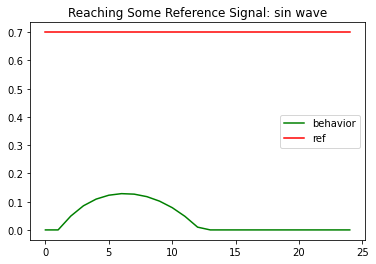

In [19]:
plt.figure(facecolor='white') 
plt.plot(time, behaviors_a, 'g', label='behavior')
plt.plot(time, ref_a, 'r', label='ref')
#plt.plot([time[0], time[-1]], [reference_signal, reference_signal], 'r')
#plt.title(f"Reaching Some Reference Signal: {reference_signal}")
plt.title("Reaching Some Reference Signal: sin wave")
plt.legend()
plt.show()

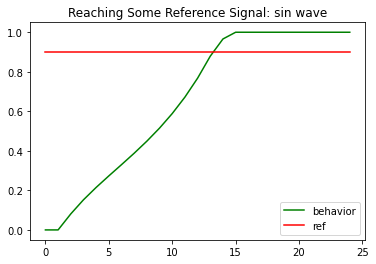

In [20]:
plt.figure(facecolor='white') 
plt.plot(time, behaviors_b, 'g', label='behavior')
plt.plot(time, ref_b, 'r', label='ref')
#plt.plot([time[0], time[-1]], [reference_signal, reference_signal], 'r')
#plt.title(f"Reaching Some Reference Signal: {reference_signal}")
plt.title("Reaching Some Reference Signal: sin wave")
plt.legend()
plt.show()